<a href="https://colab.research.google.com/github/GUILLENJV/62f1ab79cc287b001f643389/blob/master/Model_Tensorflow_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model_Tensorflow
# Multilayer

In [1]:
# Load Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
import requests
from sklearn import datasets
from sklearn import preprocessing
from collections import defaultdict
from sklearn.preprocessing import normalize
from tensorflow.python.framework import ops
ops.reset_default_graph()

##  Load Dataset 

In [2]:
df= pd.read_excel('62f1ab79cc287b001f643389.xlsx')

In [3]:
df.head()

,campaign_id,traffic_source_id,visitor_device_browser,visitor_device_hardware_family,visitor_device_hardware_model,visitor_device_hardware_vendor,visitor_device_os_family,visitor_device_os_vendor,visitor_device_os_version,visitor_device_type,...,visitor_geo_location_connection_type,visitor_geo_location_countryCode,visitor_geo_location_isp,visitor_geo_location_regionName,visitor_tokens_adh,visitor_tokens_cadid,visitor_tokens_adi,converted_yes,converted_no,landing_page_id
0,624542fb9a12e16cc0299a24,58939c5eeb1b39e23f2044bb,Mobile Safari,iPhone,iPhone,Apple,iOS,Apple,15.3.1,Phone,...,Cable/DSL,US,Comcast Cable,Florida,reghelpgetsolarnocostapril,vc7LvqetL,solarpergola,0.0,1.0,62566aa432b19a0164d802be
1,6251b74940ddb049df0dfe50,58939c5eeb1b39e23f2044bb,Chrome,Emulator,Unknown,Unknown,Windows,Microsoft,10.0,Desktop,...,Cable/DSL,US,AT&T U-verse,California,reggovhelpgetsolarnocost,LrjwavC-W,solarpergola,0.0,1.0,62566aa432b19a0164d802be
2,6249fea1b92ef259586b8116,58939c5eeb1b39e23f2044bb,Safari,Macintosh,Macintosh,Apple,macOS,Apple,10.15.6,Desktop,...,Cable/DSL,US,Comcast Cable,Illinois,regproghelpgetsolarnocostapril,KnDIBegRz,solarpergola2,0.0,1.0,62566aa432b19a0164d802be
3,624542fb9a12e16cc0299a24,58939c5eeb1b39e23f2044bb,Mobile Safari,iPhone,iPhone,Apple,iOS,Apple,15.3.1,Phone,...,Cellular,US,Verizon Wireless,Alabama,reggetsolarnocostapr,p1WEZSp1_,solarpergola2,0.0,1.0,62566aa432b19a0164d802be
4,624542fb9a12e16cc0299a24,58939c5eeb1b39e23f2044bb,Yandex.Browser for Android,Galaxy J3 Emerge,SM-J327VPP,Samsung,Android,Google,8.1,Phone,...,Cable/DSL,US,Comcast Cable,Florida,reghelpgetsolarnocostapril,vc7LvqetL,solarpergola,0.0,1.0,62566aa432b19a0164d802be


#  Data preprocessing

In [4]:
df["landing_page_id"].value_counts()

62566aa432b19a0164d802be    9652
62f1a645f4f6cb001aed258b    9652
Name: landing_page_id, dtype: int64

In [5]:
df.dtypes

campaign_id                              object
traffic_source_id                        object
visitor_device_browser                   object
visitor_device_hardware_family           object
visitor_device_hardware_model            object
visitor_device_hardware_vendor           object
visitor_device_os_family                 object
visitor_device_os_vendor                 object
visitor_device_os_version                object
visitor_device_type                      object
visitor_geo_location_cityName            object
visitor_geo_location_connection_type     object
visitor_geo_location_countryCode         object
visitor_geo_location_isp                 object
visitor_geo_location_regionName          object
visitor_tokens_adh                       object
visitor_tokens_cadid                     object
visitor_tokens_adi                       object
converted_yes                           float64
converted_no                            float64
landing_page_id                         

In [6]:
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_device_hardware_family"] = df["visitor_device_hardware_family"].apply(str)
df["visitor_device_hardware_model"] = df["visitor_device_hardware_model"].apply(str)
df["visitor_device_os_version"] = df["visitor_device_os_version"].apply(str)
df["visitor_tokens_adh"] = df["visitor_tokens_adh"].apply(str)
df["visitor_tokens_cadid"] = df["visitor_tokens_cadid"].apply(str)
df["converted_yes"] = df["converted_yes"].apply(str)
df["converted_no"] = df["converted_no"].apply(str)
df["converted_yes"] = df["converted_yes"].apply(str)
df["converted_no"] = df["converted_no"].apply(str)

In [7]:
df.dtypes

campaign_id                             object
traffic_source_id                       object
visitor_device_browser                  object
visitor_device_hardware_family          object
visitor_device_hardware_model           object
visitor_device_hardware_vendor          object
visitor_device_os_family                object
visitor_device_os_vendor                object
visitor_device_os_version               object
visitor_device_type                     object
visitor_geo_location_cityName           object
visitor_geo_location_connection_type    object
visitor_geo_location_countryCode        object
visitor_geo_location_isp                object
visitor_geo_location_regionName         object
visitor_tokens_adh                      object
visitor_tokens_cadid                    object
visitor_tokens_adi                      object
converted_yes                           object
converted_no                            object
landing_page_id                         object
dtype: object

In [8]:
df.isna().sum().sort_values()

campaign_id                               0
converted_yes                             0
visitor_tokens_cadid                      0
visitor_tokens_adh                        0
converted_no                              0
visitor_device_type                       0
visitor_device_os_version                 0
landing_page_id                           0
visitor_device_os_family                  0
visitor_device_hardware_vendor            0
visitor_device_hardware_model             0
visitor_device_hardware_family            0
visitor_device_browser                    0
traffic_source_id                         0
visitor_device_os_vendor                  0
visitor_tokens_adi                        3
visitor_geo_location_countryCode         16
visitor_geo_location_regionName          16
visitor_geo_location_isp                197
visitor_geo_location_connection_type    207
visitor_geo_location_cityName           541
dtype: int64

In [9]:
# Imputamos la variable 
df['visitor_geo_location_countryCode'].fillna(df['visitor_geo_location_countryCode'].mode()[0], inplace=True)
df['visitor_geo_location_regionName'].fillna(df['visitor_geo_location_regionName'].mode()[0], inplace=True)
df['visitor_geo_location_isp'].fillna(df['visitor_geo_location_isp'].mode()[0], inplace=True)
df['visitor_geo_location_connection_type'].fillna(df['visitor_geo_location_connection_type'].mode()[0], inplace=True)
df['visitor_geo_location_cityName'].fillna(df['visitor_geo_location_cityName'].mode()[0], inplace=True)
df['visitor_tokens_adi'].fillna(df['visitor_tokens_adi'].mode()[0], inplace=True)
df['visitor_tokens_adh'].fillna(df['visitor_tokens_adh'].mode()[0], inplace=True)
df['visitor_tokens_cadid'].fillna(df['visitor_tokens_cadid'].mode()[0], inplace=True)

In [10]:
df.isna().sum().sort_values()

campaign_id                             0
converted_yes                           0
visitor_tokens_adi                      0
visitor_tokens_cadid                    0
visitor_tokens_adh                      0
visitor_geo_location_regionName         0
visitor_geo_location_isp                0
visitor_geo_location_countryCode        0
visitor_geo_location_connection_type    0
converted_no                            0
visitor_geo_location_cityName           0
visitor_device_os_version               0
visitor_device_os_vendor                0
visitor_device_os_family                0
visitor_device_hardware_vendor          0
visitor_device_hardware_model           0
visitor_device_hardware_family          0
visitor_device_browser                  0
traffic_source_id                       0
visitor_device_type                     0
landing_page_id                         0
dtype: int64

#  Label Encode

In [11]:
# Label Encode all labels
encoder=preprocessing.LabelEncoder()
encoder_dict =defaultdict(LabelEncoder)
df = (df.apply(lambda x: encoder_dict[x.name].fit_transform(x)).astype(float))

In [12]:
X = df.iloc[:, 0:20].values
y= df.iloc[:, 20].values  

##  Split Data

In [13]:
# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(X), round(len(X)*0.8), replace=False)
test_indices = np.array(list(set(range(len(X))) - set(train_indices)))
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

In [14]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(15443, 20) (3861, 20)
(15443,) (3861,)


In [15]:
# Normalize by column (min-max norm)
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)
    
X_vals_train = np.nan_to_num(normalize_cols(X_train))
X_vals_test = np.nan_to_num(normalize_cols(X_test))

## Define Tensorflow computational graph

In [16]:
import tensorflow.compat.v1 as tf

In [17]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [18]:
# Declare batch size
batch_size = 90

In [19]:
# Create graph
sess = tf.Session()

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 20], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [20]:
# Create variable definition
def init_variable(shape):
    return(tf.Variable(tf.random_normal(shape=shape)))


# Create a logistic layer definition
def logistic(input_layer, multiplication_weight, bias_weight, activation = True):
    linear_layer = tf.add(tf.matmul(input_layer, multiplication_weight), bias_weight)
    # We separate the activation at the end because the loss function will
    # implement the last sigmoid necessary
    if activation:
        return(tf.nn.sigmoid(linear_layer))
    else:
        return(linear_layer)

In [21]:
# First logistic layer (20 inputs to 10 hidden nodes)
A1 = init_variable(shape=[20,10])
b1 = init_variable(shape=[10])
logistic_layer1 = logistic(x_data, A1, b1)

# Second logistic layer (10 hidden inputs to 5 hidden nodes)
A2 = init_variable(shape=[10,5])
b2 = init_variable(shape=[5])
logistic_layer2 = logistic(logistic_layer1, A2, b2)

# Final output layer (5 hidden nodes to 1 output)
A3 = init_variable(shape=[5,1])
b3 = init_variable(shape=[1])
final_output = logistic(logistic_layer2, A3, b3, activation=False)

In [22]:
# Declare loss function (Cross Entropy loss)
#cross_entropy  = tf.reduce_mean(-tf.reduce_sum(y_ * tf.math.log(y), reduction_indices=[1]))
#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=final_output,labels=y_target))
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=final_output, labels=y_target))

In [23]:
# Declare optimizer
my_opt = tf.train.AdamOptimizer(learning_rate = 0.002)
train_step = my_opt.minimize(loss)

# Train model

In [24]:
# Create graph session 
sess = tf.Session()
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [25]:
# Actual Prediction
prediction = tf.round(tf.nn.sigmoid(final_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

# Training loop
loss_vec = []
train_acc = []
test_acc = []
for i in range(5000):
    rand_index = np.random.choice(len(X_vals_train), size=batch_size)
    rand_x = X_vals_train[rand_index]
    rand_y = np.transpose([y_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    temp_acc_train = sess.run(accuracy, feed_dict={x_data: X_vals_train, y_target: np.transpose([y_train])})
    train_acc.append(temp_acc_train)
    temp_acc_test = sess.run(accuracy, feed_dict={x_data: X_vals_test, y_target: np.transpose([y_test])})
    test_acc.append(temp_acc_test)
    if (i+1)%500==0:
      #print('Loss = ' + str(temp_loss))

      # Cálculo del accuracy.
      #acc_test = np.mean(np.round(temp_acc_test) == y_test) 
      #acc_train = np.mean(np.round(temp_acc_train) == y_train )
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))
print ("Train Accuracy =" , "{:.5f}".format(temp_acc_train))
print ("Test Accuracy =" , "{:.5f}".format(temp_acc_test))

Generation: 500. Loss = 0.3612859
Generation: 1000. Loss = 0.3319971
Generation: 1500. Loss = 0.3040069
Generation: 2000. Loss = 0.33022797
Generation: 2500. Loss = 0.26947436
Generation: 3000. Loss = 0.20469265
Generation: 3500. Loss = 0.21051918
Generation: 4000. Loss = 0.2182311
Generation: 4500. Loss = 0.19570902
Generation: 5000. Loss = 0.15670252
Train Accuracy = 0.92385
Test Accuracy = 0.91712


## Display model performance

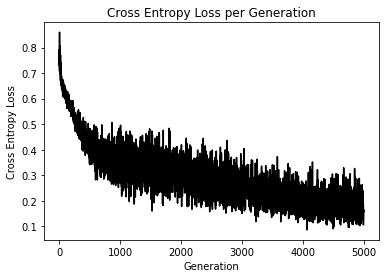

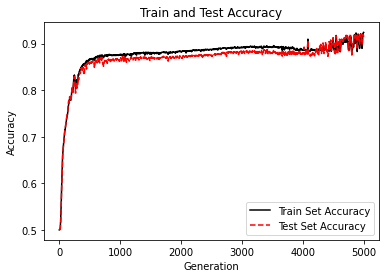

In [26]:
%matplotlib inline
# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Cross Entropy Loss')
plt.show()

# Plot train and test accuracy
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()